In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Text(0,0.5,'Number of pixels')

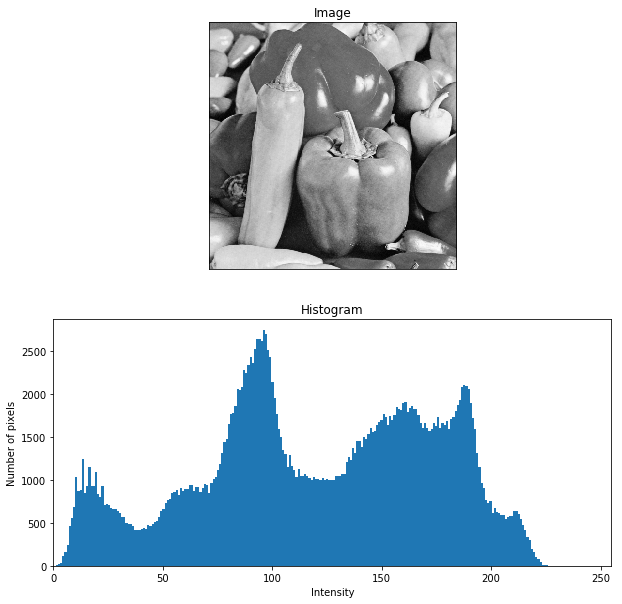

In [2]:
#B-W image
path = 'misc/'
imgpath1 = path + '4.2.07.tiff'
img = cv2.imread(imgpath1, 0)
plt.figure(figsize=(10, 10))
#Image
plt.subplot(2, 1, 1)
plt.imshow(img, cmap='gray')
plt.title("Image")
plt.xticks([])
plt.yticks([])
#Histogram
plt.subplot(2, 1, 2)
plt.hist(img.ravel(), 256, [0, 255])
plt.title("Histogram")
plt.xlim(xmin=0, xmax=255)
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")

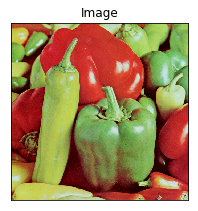

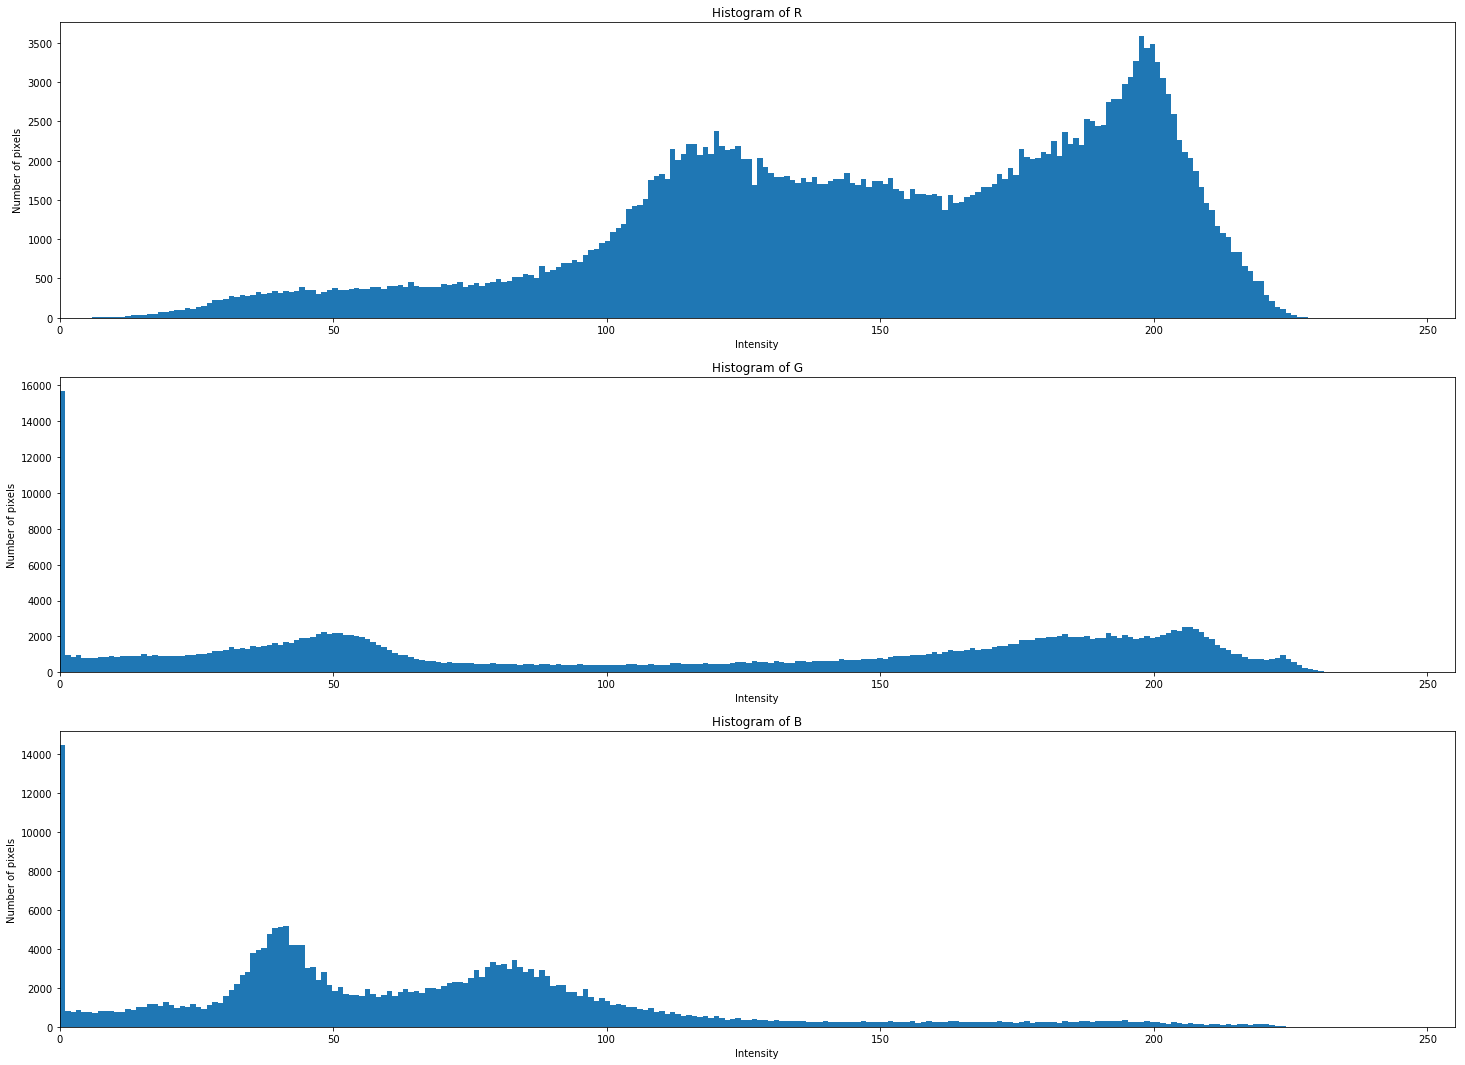

In [3]:
#Matplotlib histogram
path = 'misc/'
imgpath1 = path + '4.2.07.tiff'
img = cv2.imread(imgpath1, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

R, G, B = cv2.split(img)

#Image
plt.figure(figsize=(15, 15))
plt.subplot(4, 1, 1)
plt.imshow(img)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()
#Histogram
plt.figure(figsize=(25, 25))
plt.subplot(4, 1, 2)
plt.hist(R.ravel(), 256, [0, 255])
plt.title("Histogram of R")
plt.xlim(xmin=0, xmax=255)
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")

plt.subplot(4, 1, 3)
plt.hist(G.ravel(), 256, [0, 255])
plt.title("Histogram of G")
plt.xlim(xmin=0, xmax=255)
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")

plt.subplot(4, 1, 4)
plt.hist(B.ravel(), 256, [0, 255])
plt.title("Histogram of B")
plt.xlim(xmin=0, xmax=255)
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")

plt.show()

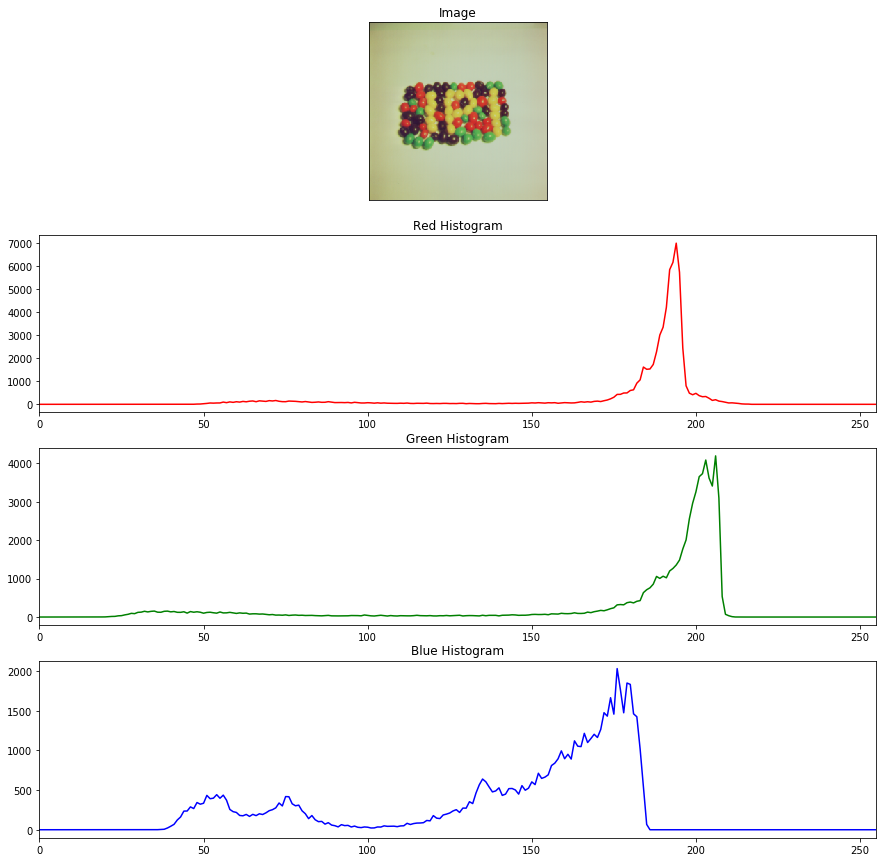

In [5]:
#Numpy histogram
path = 'misc/'
imgpath1 = path + '4.1.07.tiff'
img = cv2.imread(imgpath1, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R, G, B = cv2.split(img)

plt.figure(figsize=(15, 15))
plt.subplot(4, 1, 1)
plt.imshow(img)
plt.title('Image')
plt.xticks([])
plt.yticks([])
    
plt.subplot(4, 1, 2)
hist, bins = np.histogram(R.ravel(), 256, [0,255])
plt.xlim([0, 255])
plt.plot(hist, color='r')
plt.title('Red Histogram')

plt.subplot(4, 1, 3)
hist, bins = np.histogram(G.ravel(), 256, [0,255])
plt.xlim([0, 255])
plt.plot(hist, color='g')
plt.title('Green Histogram')

plt.subplot(4, 1, 4)
hist, bins = np.histogram(B.ravel(), 256, [0,255])
plt.xlim([0, 255])
plt.plot(hist, color='b')
plt.title('Blue Histogram')    

plt.show()

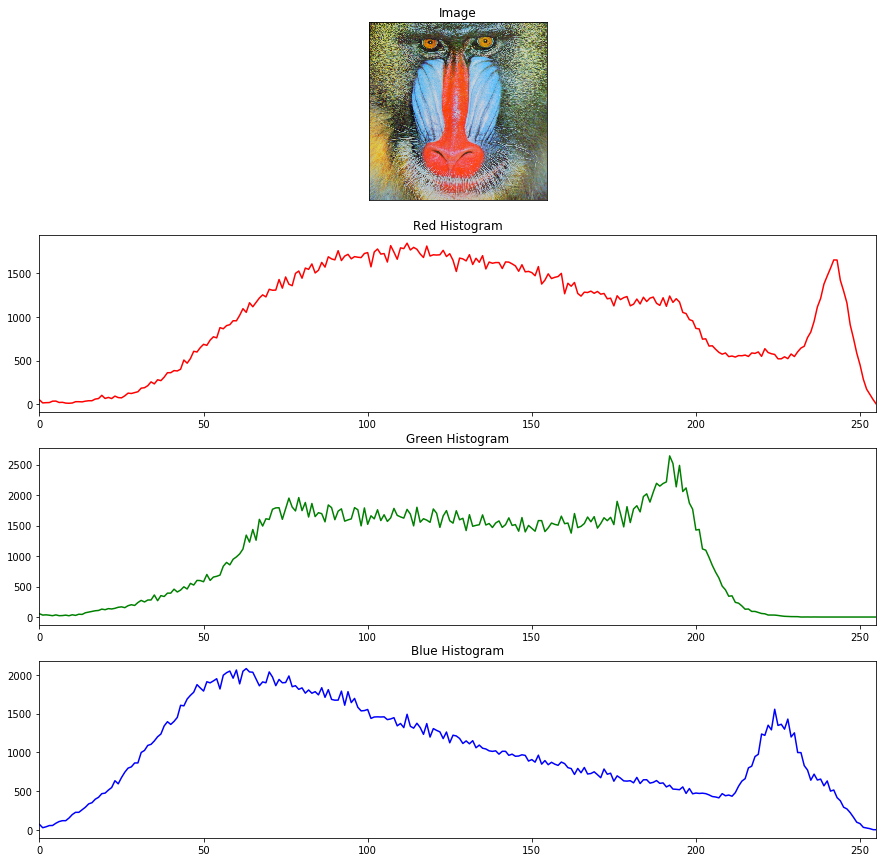

In [6]:
#OpenCV histogram
path = 'misc/'
imgpath1 = path + '4.2.03.tiff'
img = cv2.imread(imgpath1, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R, G, B = cv2.split(img)
def create_histogram(img, title='Image'):
    red_hist = cv2.calcHist([img], [0], None, [256], [0, 255])
    green_hist = cv2.calcHist([img], [1], None, [256], [0, 255])
    blue_hist = cv2.calcHist([img], [2], None, [256], [0, 255])

    plt.figure(figsize=(15, 15))
    plt.subplot(4, 1, 1)
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(4, 1, 2)
    plt.xlim([0, 255])
    plt.plot(red_hist, color='r')
    plt.title('Red Histogram')

    plt.subplot(4, 1, 3)
    plt.xlim([0, 255])
    plt.plot(green_hist, color='g')
    plt.title('Green Histogram')

    plt.subplot(4, 1, 4)
    plt.xlim([0, 255])
    plt.plot(blue_hist, color='b')
    plt.title('Blue Histogram')    

    plt.show()
    
create_histogram(img, 'Image')    

<Figure size 1080x1080 with 0 Axes>

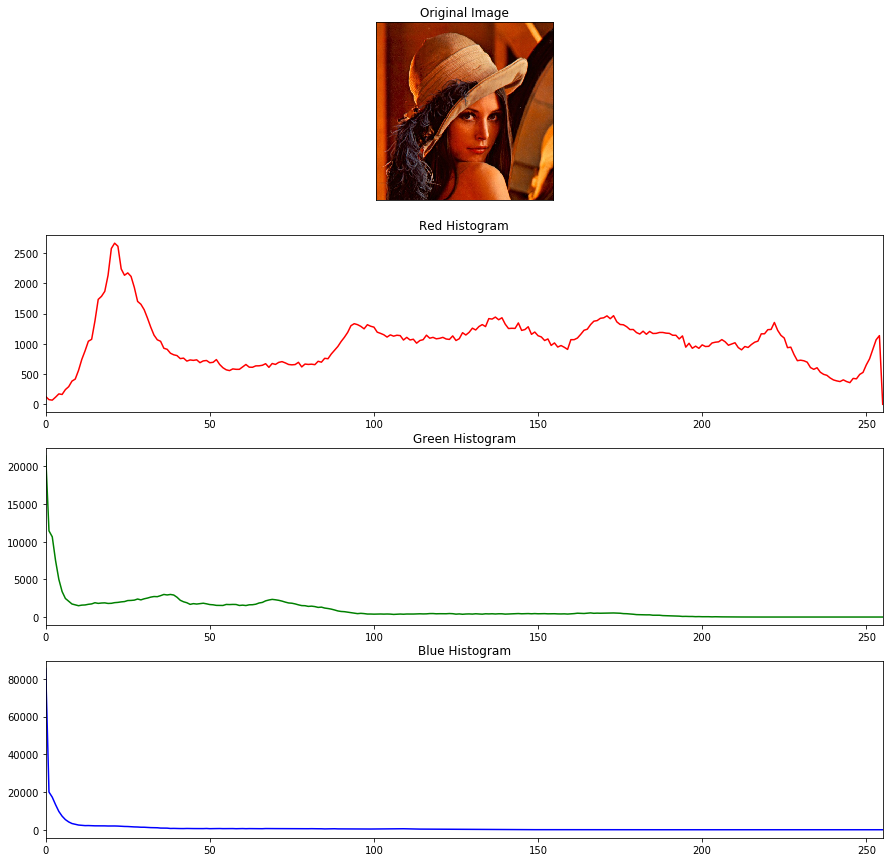

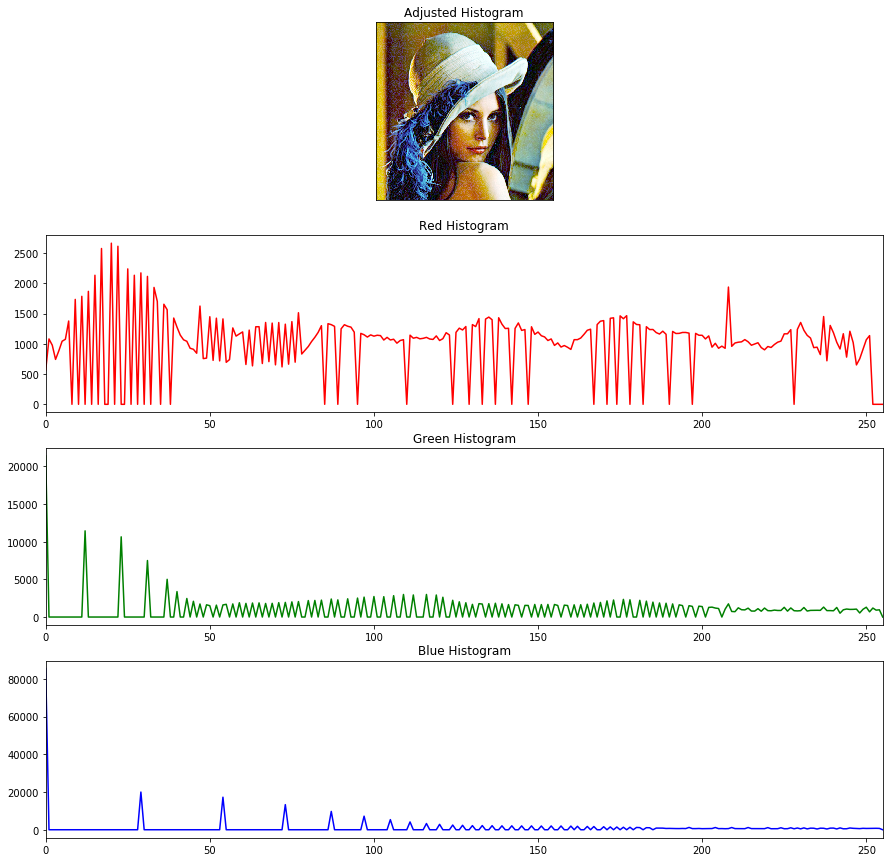

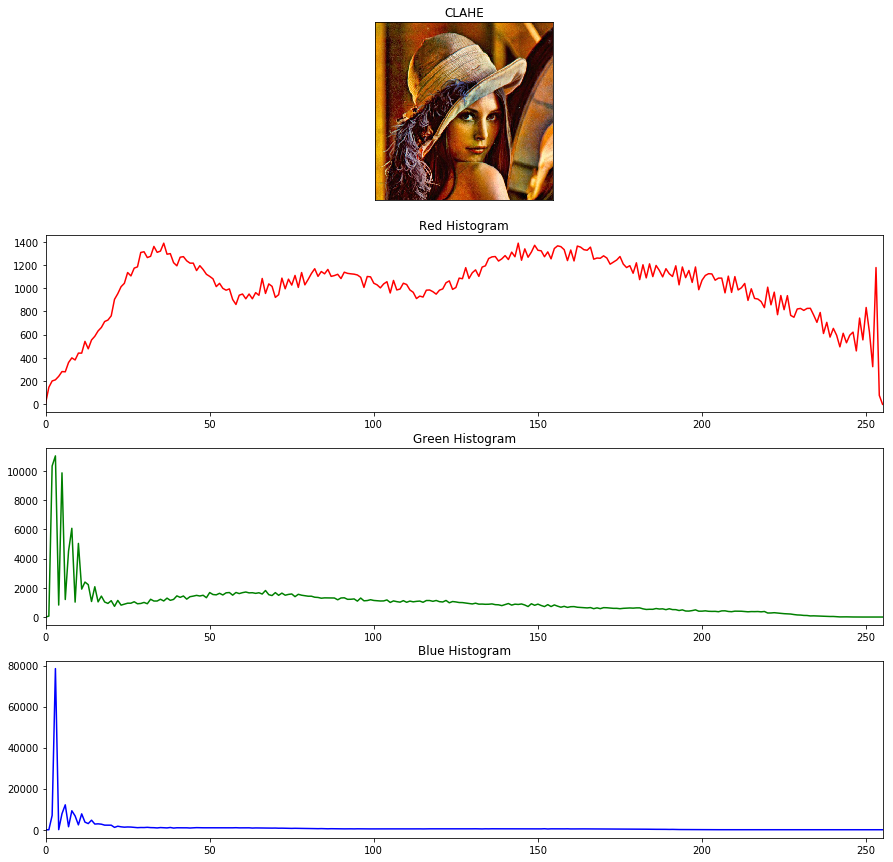

In [9]:
#Histogram equalisation
path = 'misc/'
imgpath1 = path + '4.2.04.tiff'
img = cv2.imread(imgpath1, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R, G, B = cv2.split(img)

R, G, B = cv2.split(img)
    
output1_R = cv2.equalizeHist(R)
output1_G = cv2.equalizeHist(G)
output1_B = cv2.equalizeHist(B)

output1 = cv2.merge((output1_R, output1_G, output1_B))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

output2_R = clahe.apply(R)
output2_G = clahe.apply(G)
output2_B = clahe.apply(B)

output2 = cv2.merge((output2_R, output2_G, output2_B))


output = [img, output1, output2]
titles = ['Original Image', 'Adjusted Histogram', 'CLAHE']

plt.figure(figsize=(15, 15))
for i,title in enumerate(titles):
    create_histogram(output[i], title)
